In [2]:
df=pd.read_csv("/kaggle/input/black-friday-sales-eda/train.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
del df['Product_Category_2']

In [6]:
del df['Product_Category_3']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [10]:
for column in df.columns:
    print(column,":",df[column].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 20
Purchase : 18105


In [12]:
df[df['Gender']=='M']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
550057,1006023,P00370853,M,26-35,0,C,2,1,19,61
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473


In [13]:
df[df['Gender']=='F']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378
...,...,...,...,...,...,...,...,...,...,...
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [15]:
df.groupby('Gender').size()

Gender
F    135809
M    414259
dtype: int64

<Axes: >

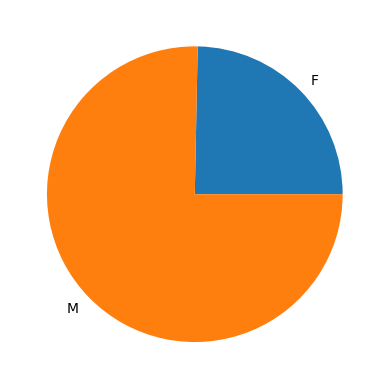

In [18]:
df.groupby('Gender').size().plot(kind='pie')

<Axes: xlabel='Gender'>

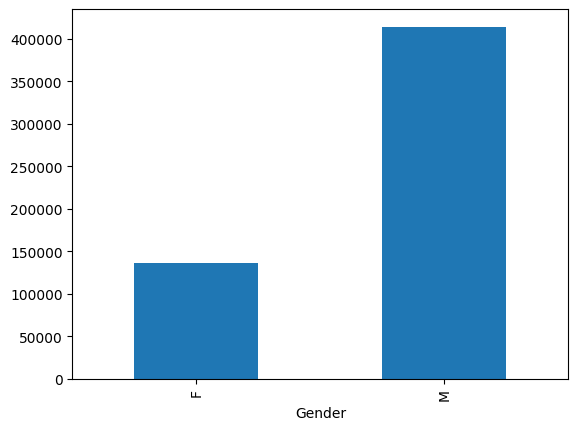

In [19]:
df.groupby('Gender').size().plot(kind='bar')

<Axes: >

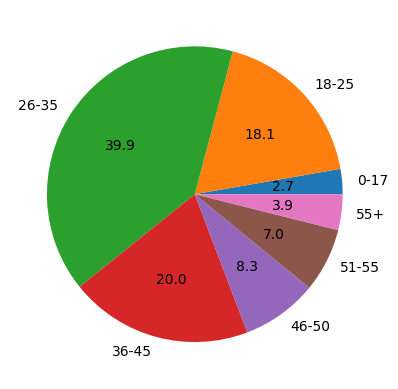

In [21]:
df.groupby('Age').size().plot(kind='pie',autopct="%.1f")

<Axes: xlabel='Age'>

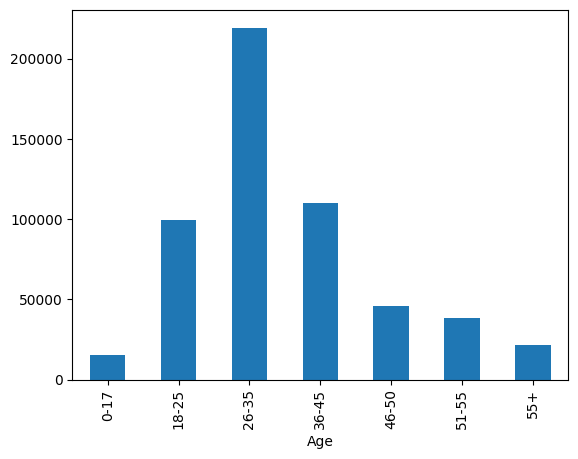

In [23]:
df.groupby('Age').size().plot(kind='bar')

In [25]:
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])

In [26]:
data=pd.DataFrame(lst,columns=['Age','Products'])

<Axes: xlabel='Age'>

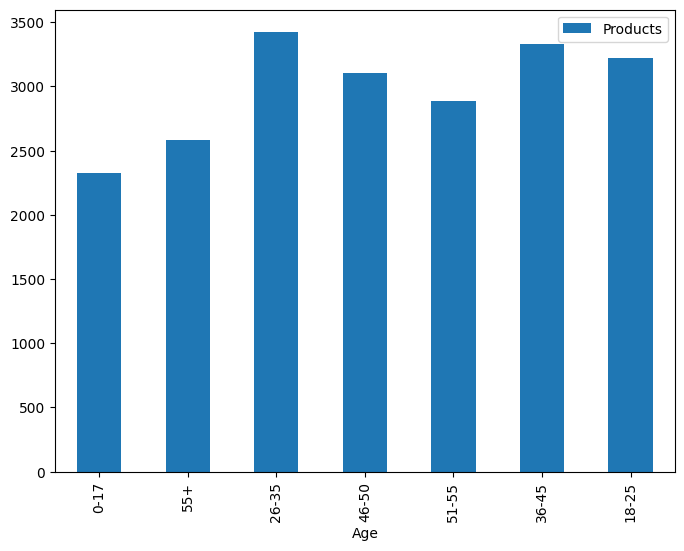

In [27]:
data.plot.bar(x='Age',figsize=(8,6))

<Axes: title={'center': 'Amount spend by age'}, xlabel='Age'>

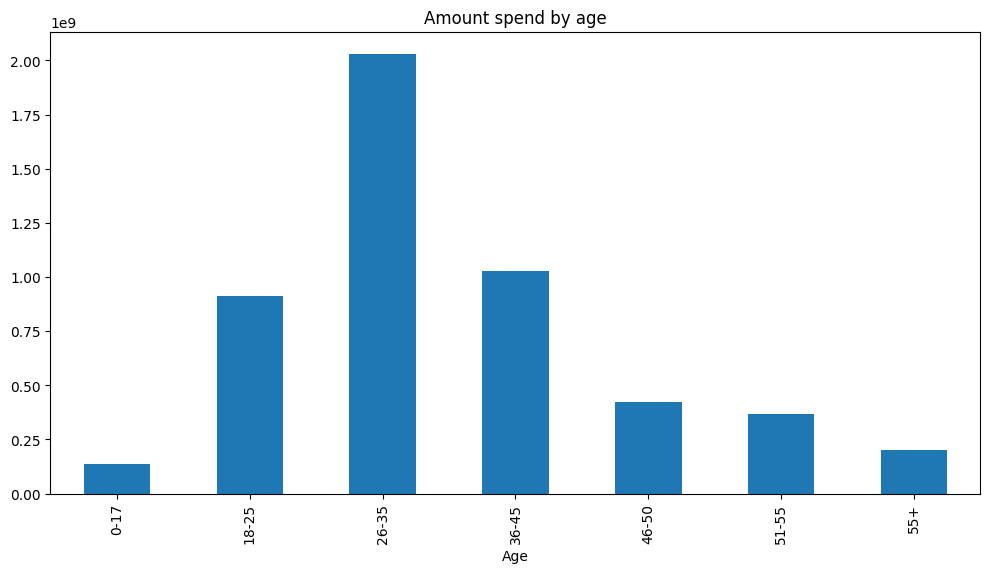

In [28]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar',figsize=(12,6),title='Amount spend by age')

<Axes: title={'center': 'Amount spend by age'}, xlabel='Age'>

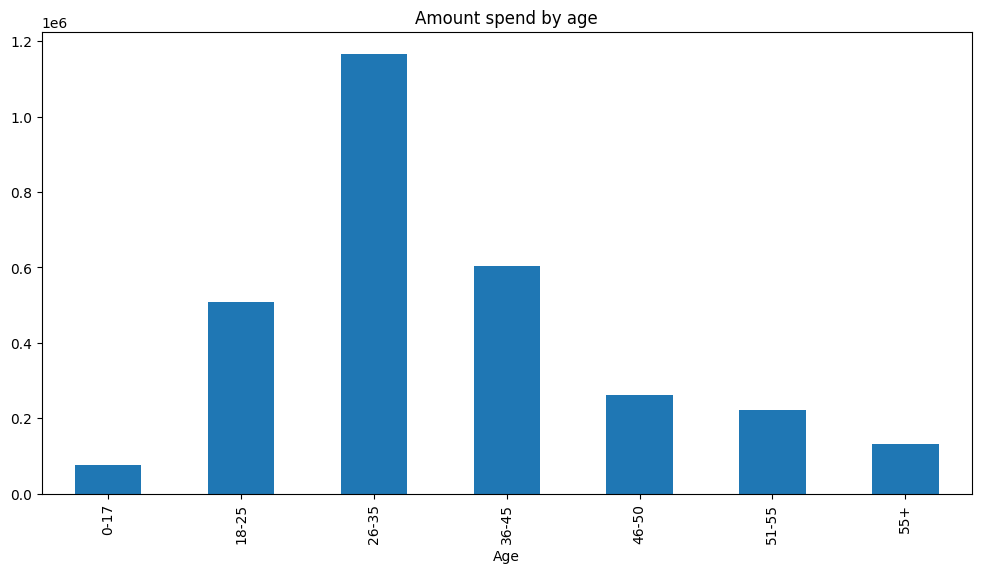

In [29]:
df.groupby('Age').sum()['Product_Category_1'].plot(kind='bar',figsize=(12,6),title='Amount spend by age')

<Axes: >

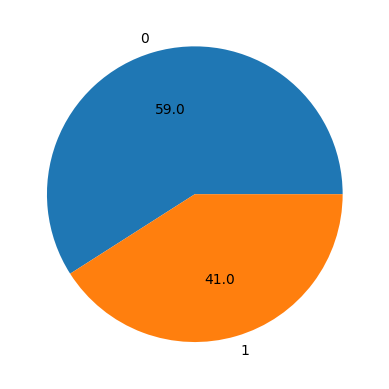

In [37]:
df.groupby('Marital_Status').size().plot(kind='pie',autopct='%0.1f')

In [39]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='count'>

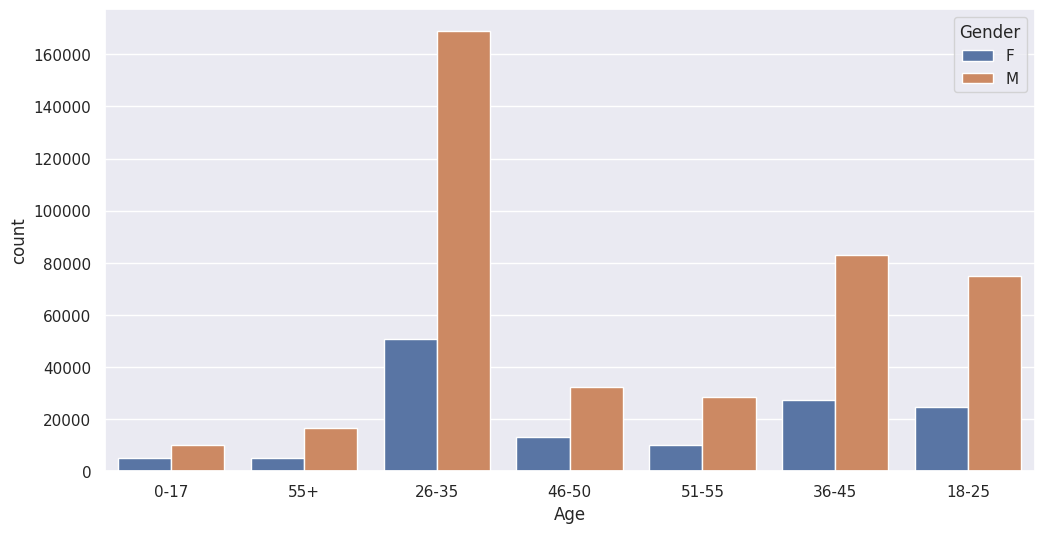

In [43]:

sns.countplot(x='Age',hue='Gender',data=df)

<Axes: xlabel='Gender', ylabel='count'>

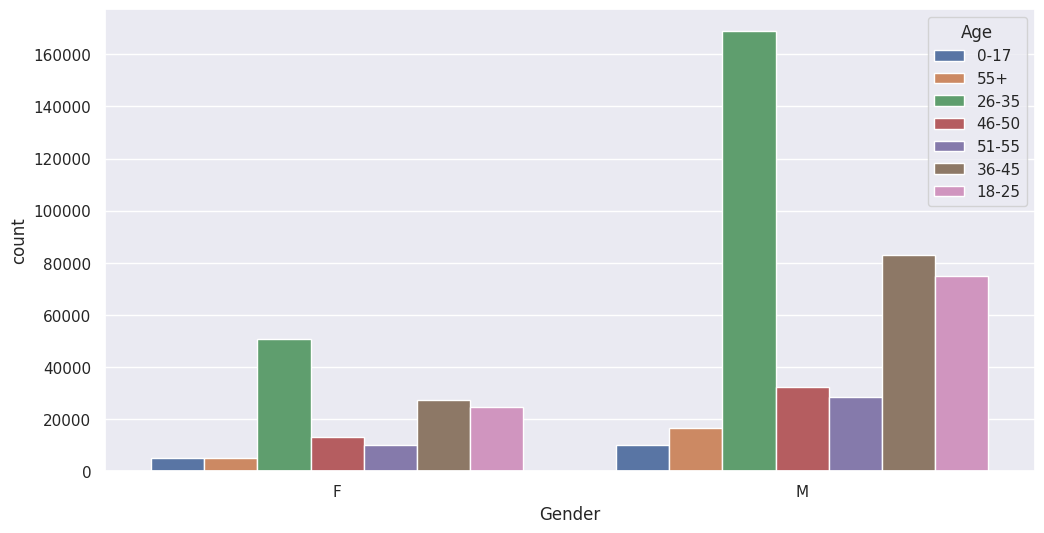

In [42]:
sns.countplot(x='Gender',hue='Age',data=df)

<Axes: xlabel='Gender', ylabel='count'>

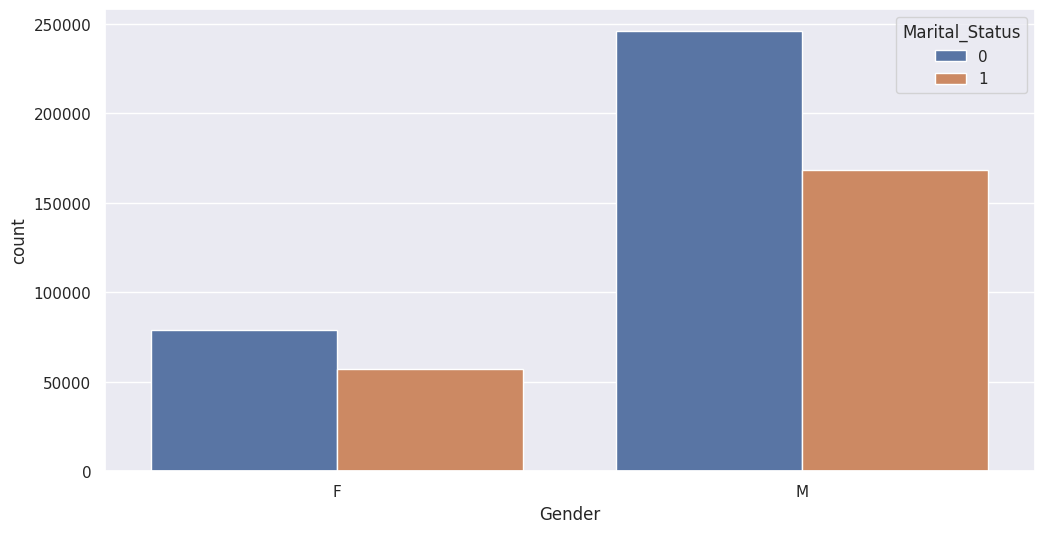

In [44]:
sns.countplot(x='Gender',hue='Marital_Status',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

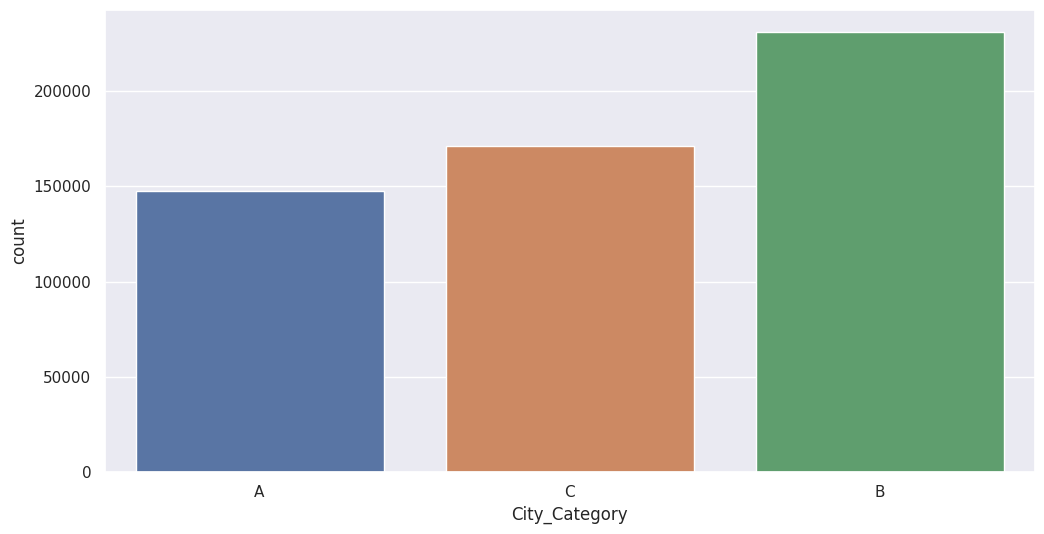

In [46]:
sns.countplot(x=df['City_Category'])

<Axes: xlabel='City_Category', ylabel='count'>

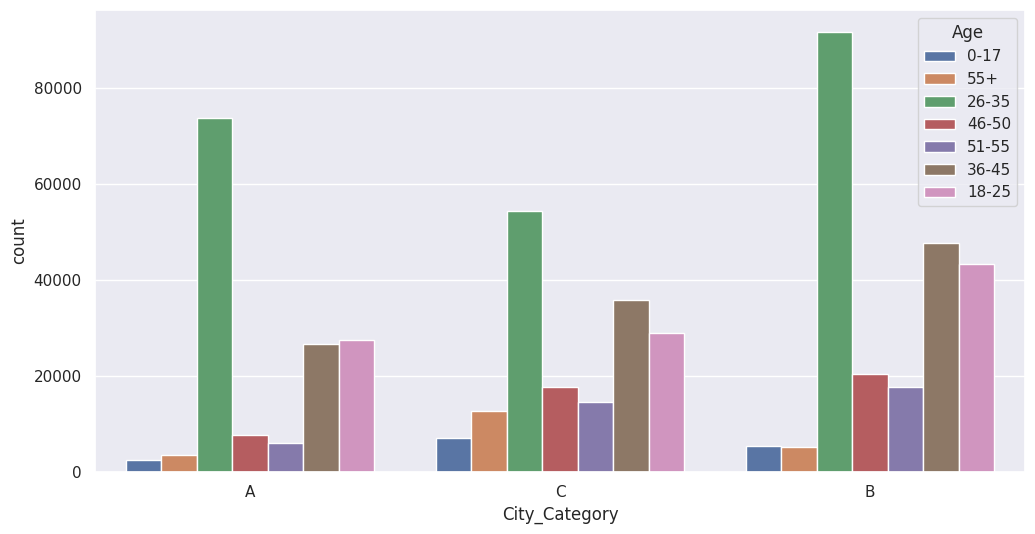

In [47]:
sns.countplot(x='City_Category',hue='Age',data=df)

<Axes: >

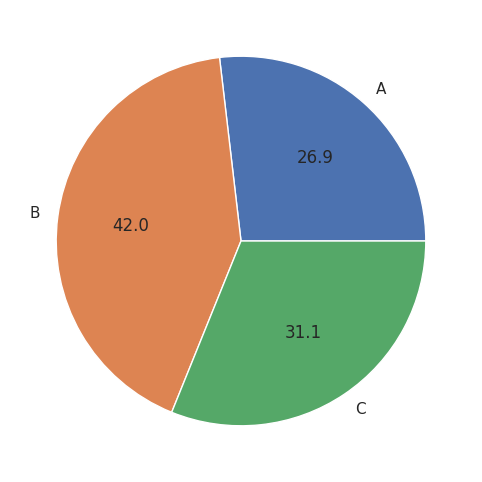

In [49]:
df.groupby('City_Category').size().plot(kind='pie',autopct='%.1f')

<Axes: ylabel='Purchase'>

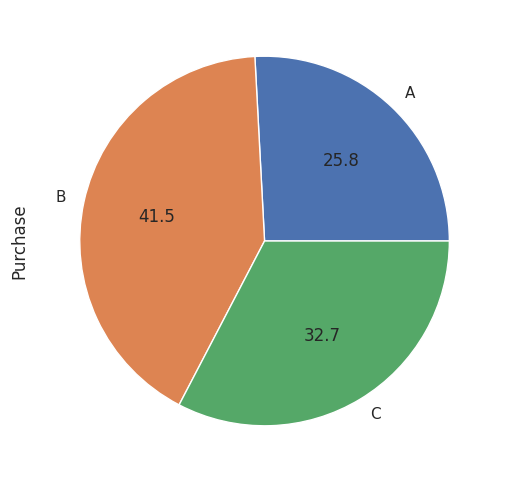

In [51]:
df.groupby('City_Category').sum()['Purchase'].plot(kind='pie',autopct='%.1f')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

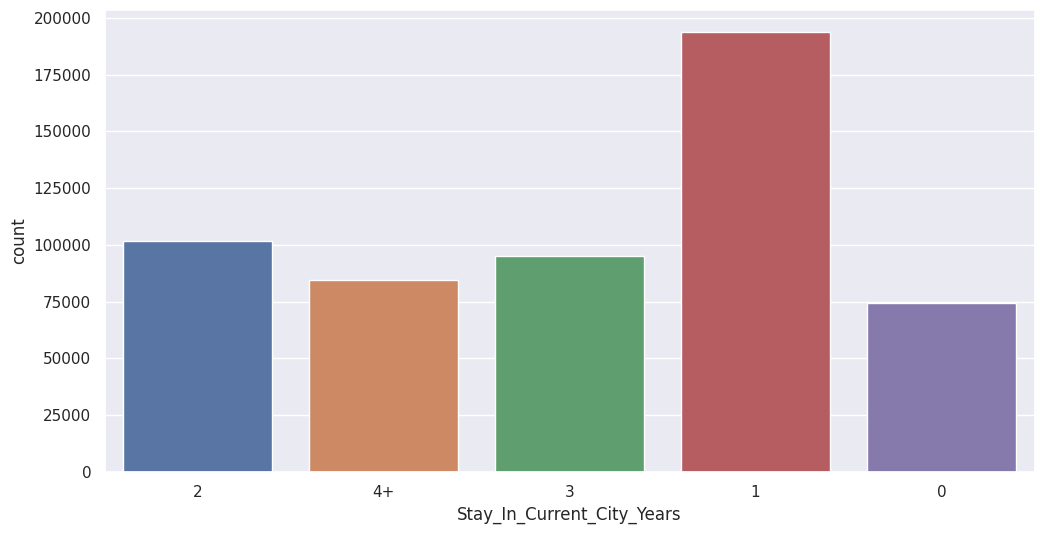

In [57]:
sns.countplot(x=df['Stay_In_Current_City_Years'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

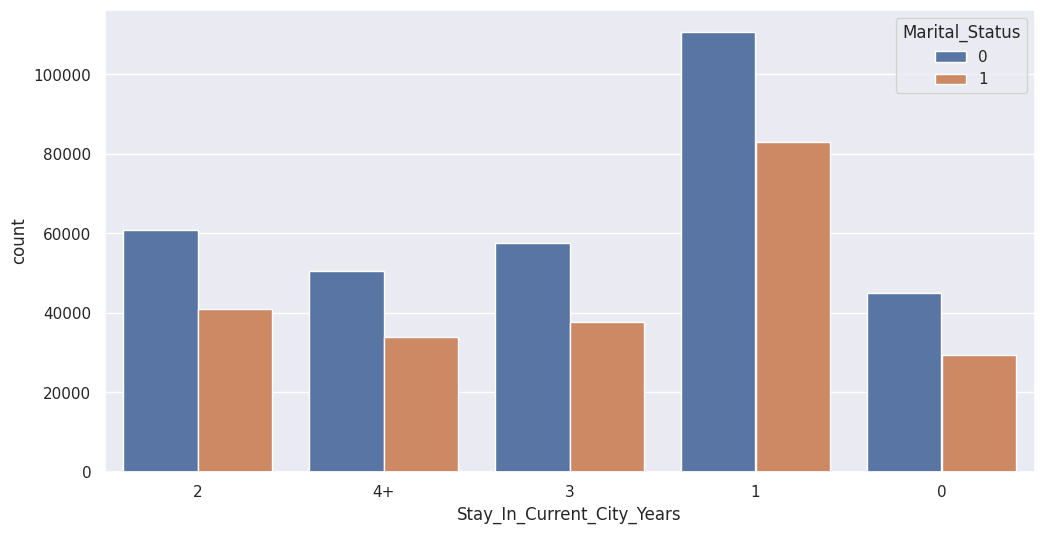

In [58]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Marital_Status',data=df)

<Axes: xlabel='Occupation', ylabel='count'>

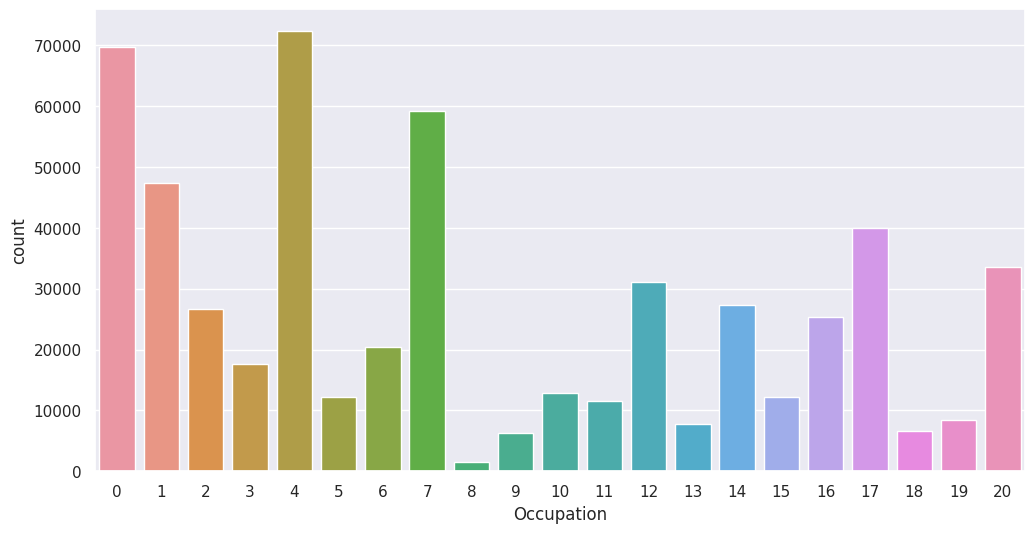

In [62]:
sns.countplot(x=df['Occupation'])

<Axes: xlabel='Occupation'>

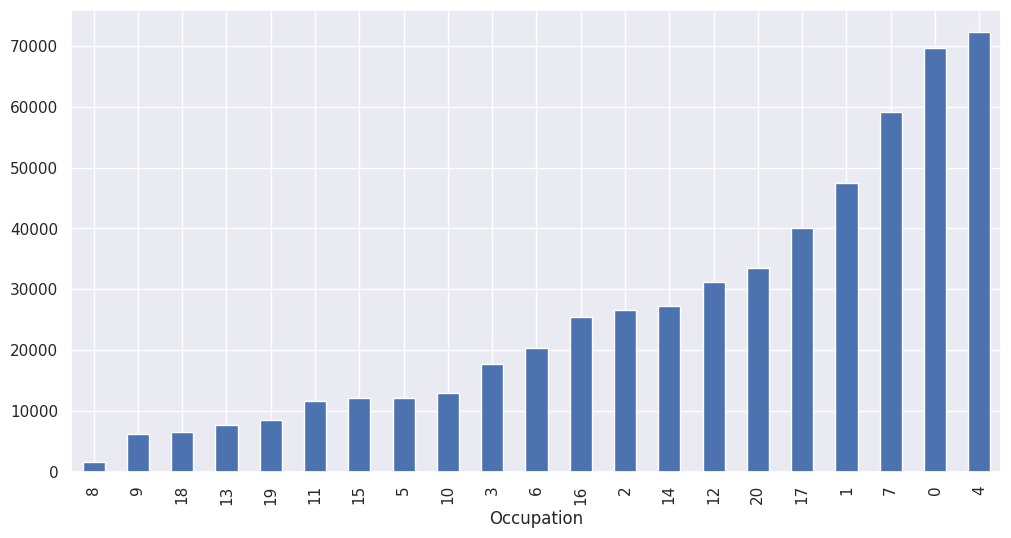

In [67]:
df.groupby('Occupation').size().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation', ylabel='count'>

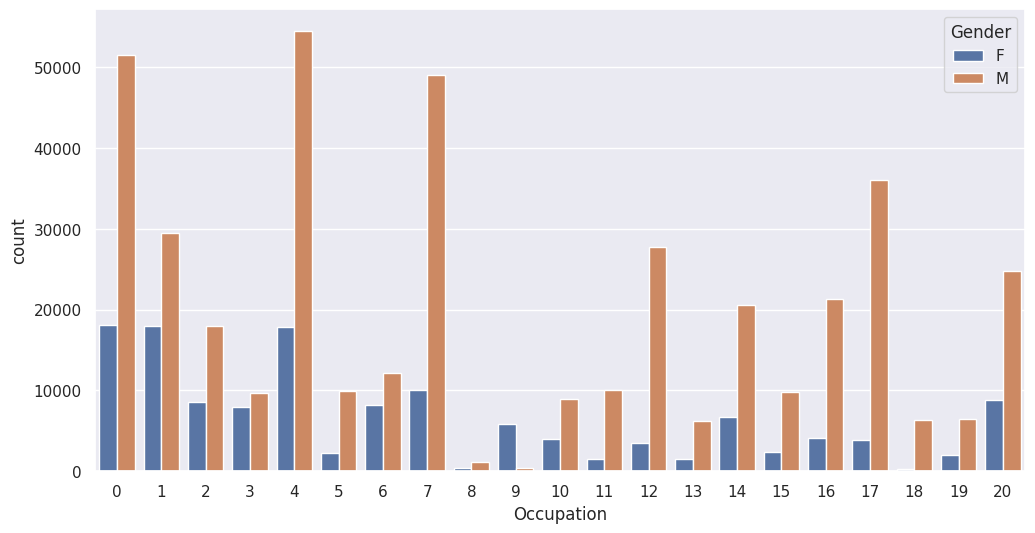

In [71]:
sns.countplot(x='Occupation',hue='Gender',data=df)

<Axes: xlabel='Occupation', ylabel='count'>

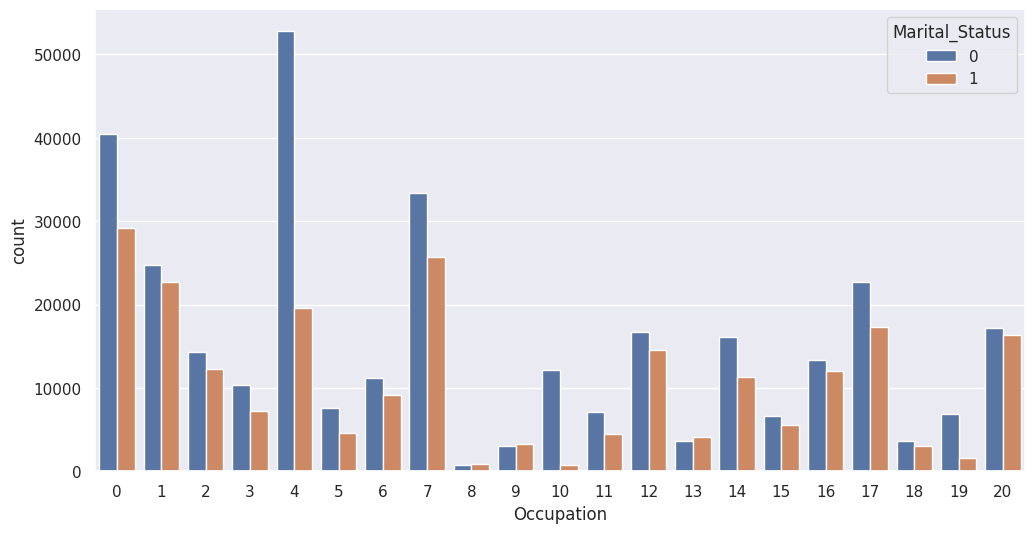

In [72]:
sns.countplot(x='Occupation',hue='Marital_Status',data=df)

<Axes: xlabel='Occupation'>

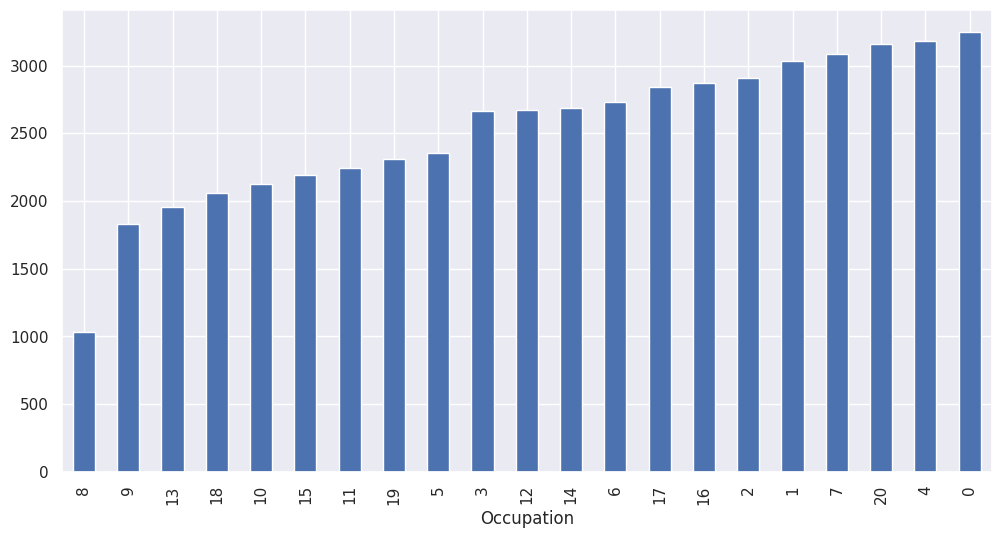

In [74]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

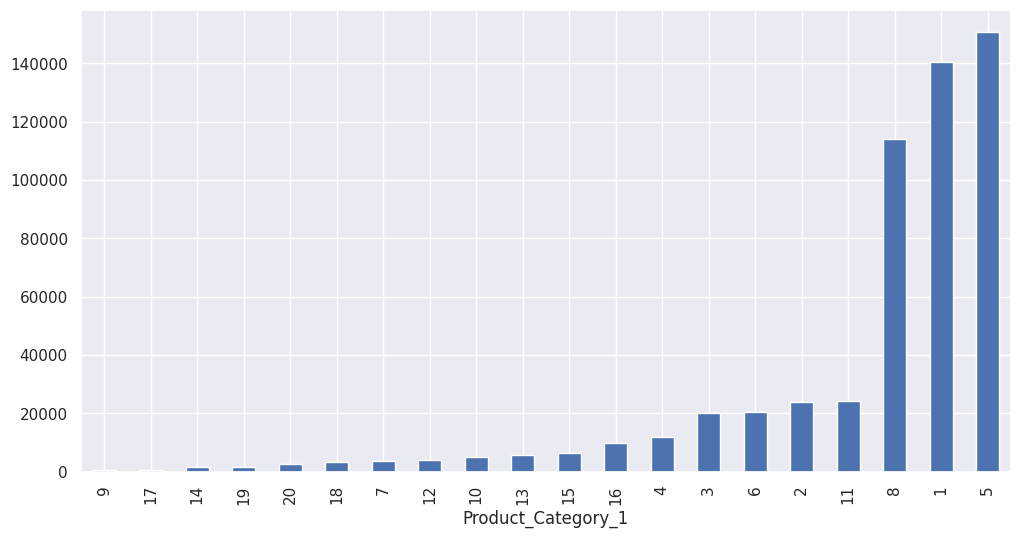

In [75]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

<Axes: xlabel='Product_ID'>

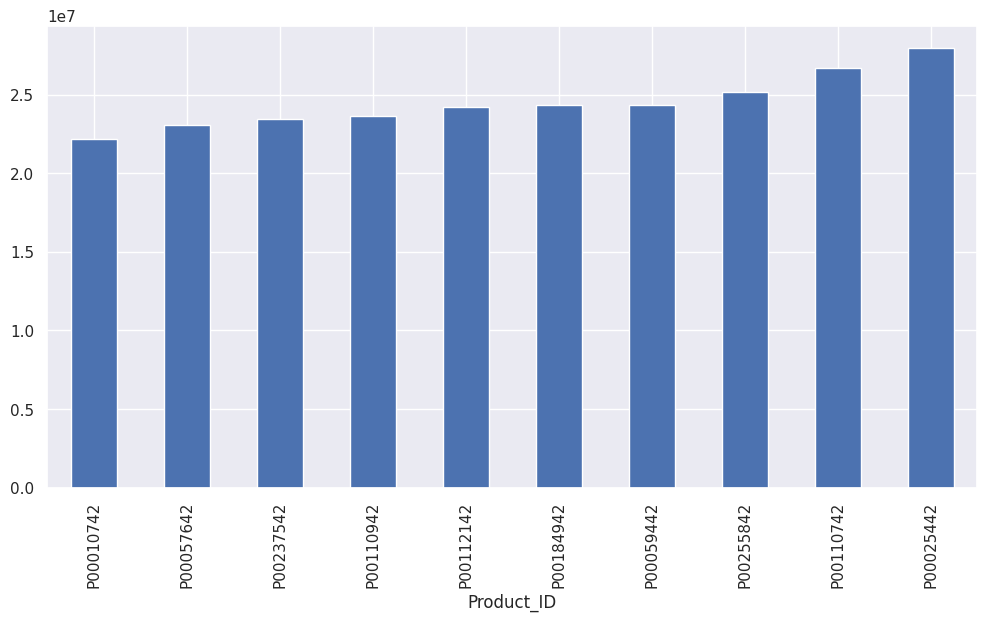

In [78]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind='bar')

<Axes: xlabel='Product_ID'>

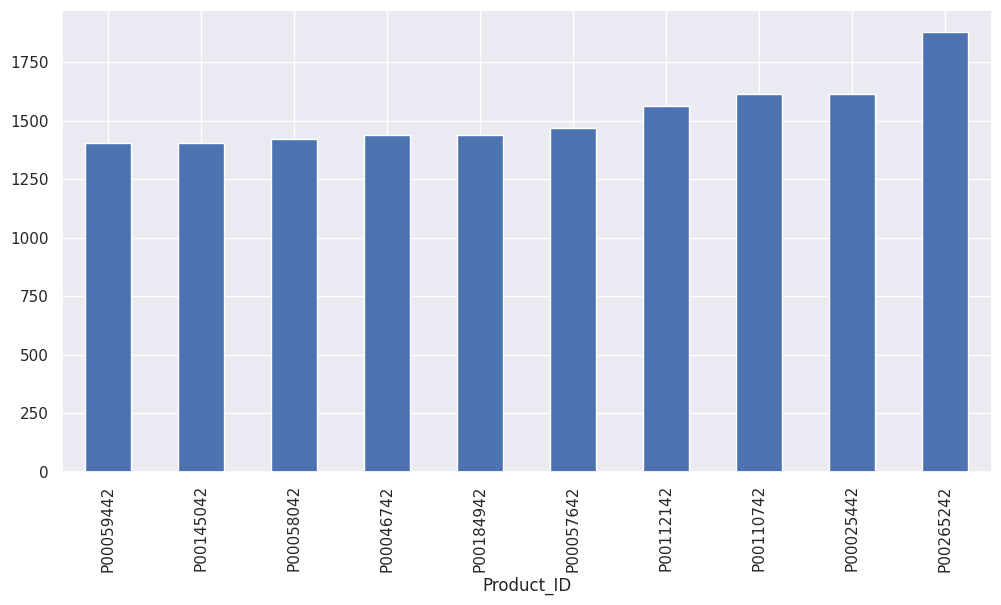

In [80]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind='bar')

In [82]:
l=[]
for i in range (len(df)):
    l.append(df['Gender'][i]+"-"+str(df['Marital_Status'][i]))
df['MaritalGender']=l

<Axes: xlabel='MaritalGender', ylabel='count'>

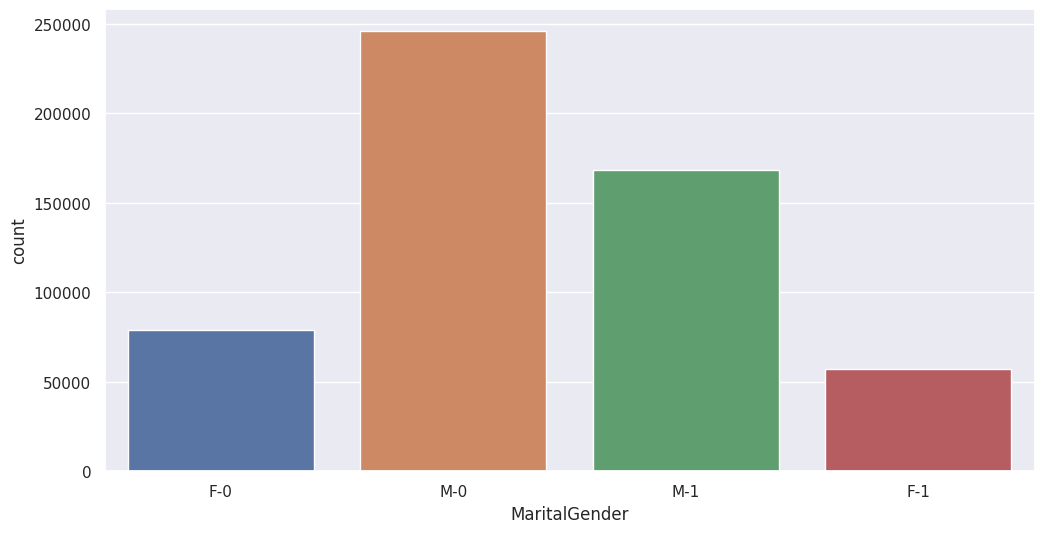

In [83]:
sns.countplot(x=df['MaritalGender'])

<Axes: xlabel='Age', ylabel='count'>

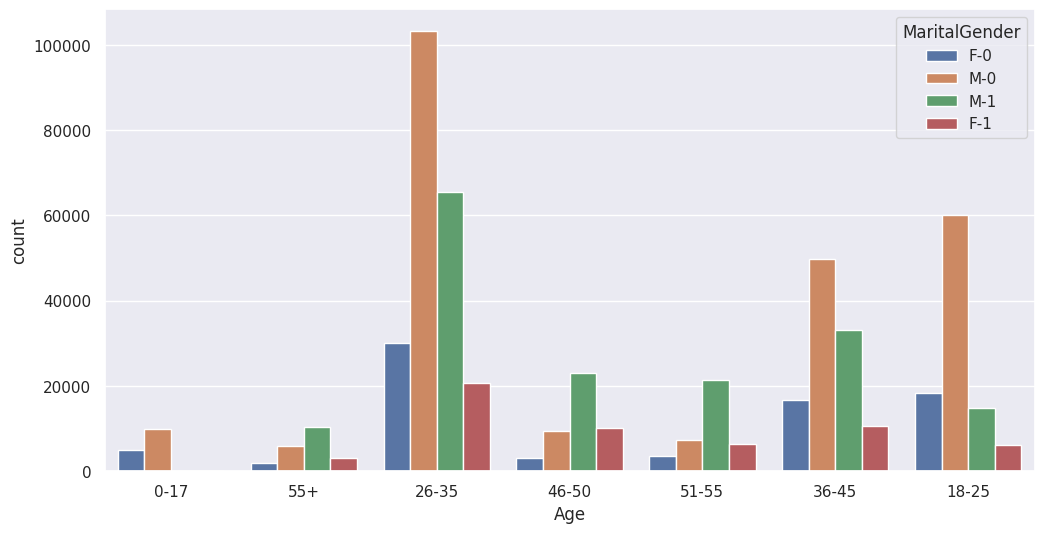

In [84]:
sns.countplot(x=df['Age'],hue=df['MaritalGender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

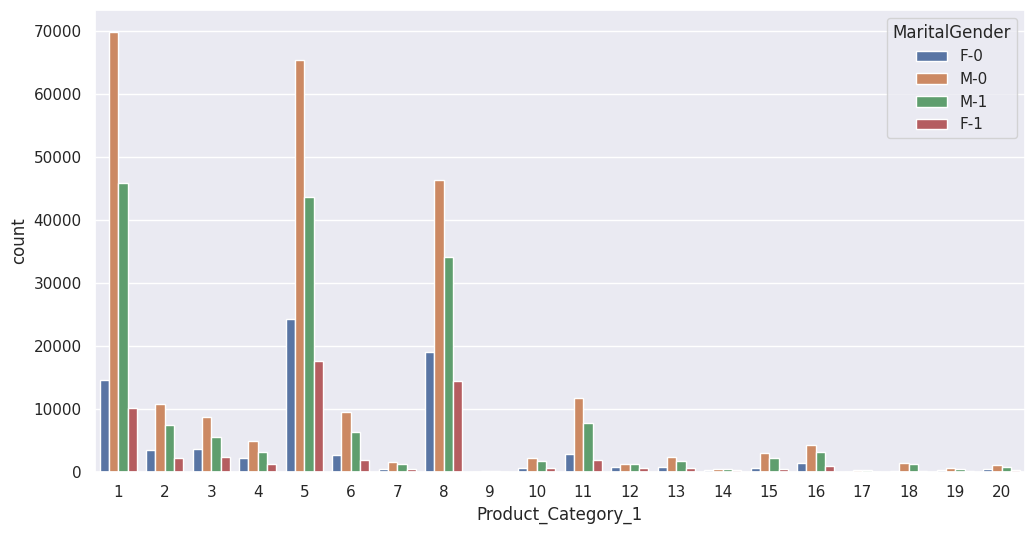

In [85]:
sns.countplot(x=df['Product_Category_1'],hue=df['MaritalGender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

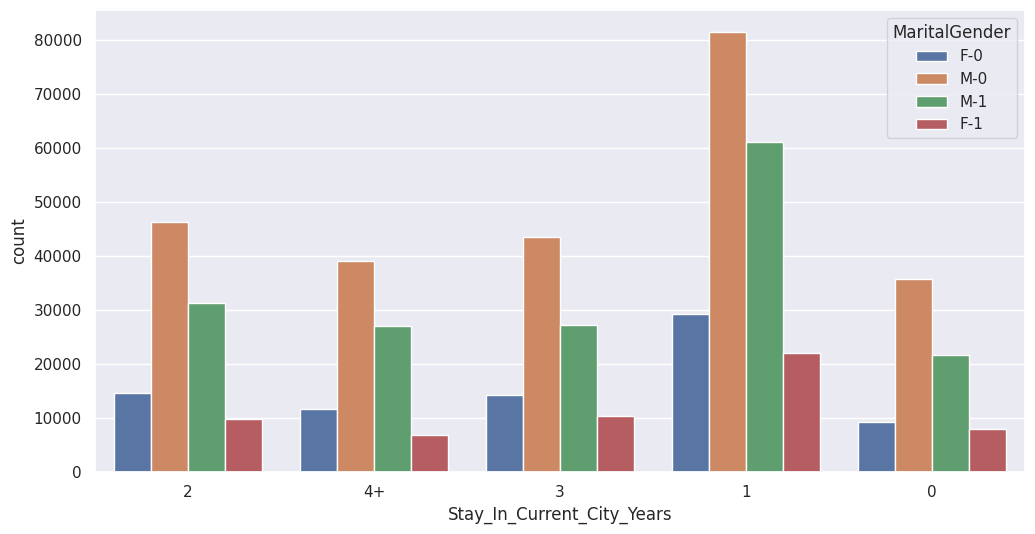

In [86]:
sns.countplot(x=df['Stay_In_Current_City_Years'],hue=df['MaritalGender'])

<Axes: xlabel='City_Category', ylabel='count'>

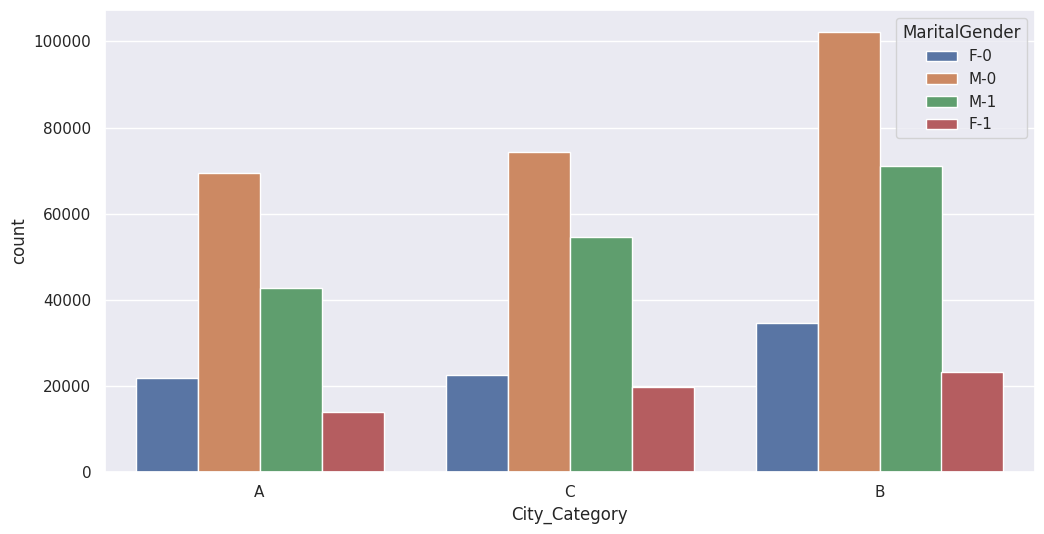

In [87]:
sns.countplot(x=df['City_Category'],hue=df['MaritalGender'])